Student Name: Conor Apcar

Student Number: 44624336

In [85]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats.stats import pearsonr

wine = pd.read_csv('wine_train.csv') #Create a dataframe for the wine_train data
wine.head()

,Year,LogPrice,WinterRain,Temperature,HarvestRain,TimeYears
0,1952,-0.99868,600,17.1167,160,31
1,1953,-0.45440,690,16.7333,80,30
2,1955,-0.80796,502,17.1500,130,28
3,1957,-1.50926,420,16.1333,110,26
4,1958,-1.71655,582,16.4167,187,25


Went through to look at all the data in different ways to check for any outliers. Looked at the data as a whole first but nothing stood out. 

Checked the data collectively in the describe() function to see if anything looked strange but it all seemed ok to me. 

In [81]:
wine #Check the full data

,Year,LogPrice,WinterRain,Temperature,HarvestRain,TimeYears
0,1952,-0.99868,600,17.1167,160,31
1,1953,-0.45440,690,16.7333,80,30
2,1955,-0.80796,502,17.1500,130,28
3,1957,-1.50926,420,16.1333,110,26
4,1958,-1.71655,582,16.4167,187,25
5,1959,-0.41800,485,17.4833,187,24
6,1960,-1.97491,763,16.4167,290,23
7,1961,0.00000,830,17.3333,38,22
8,1962,-1.10572,697,16.3000,52,21
9,1963,-1.78098,608,15.7167,155,20


In [2]:
wine.shape #Check the Shape

(24, 6)

In [9]:
wine.describe() #Check the data

,Year,LogPrice,WinterRain,Temperature,HarvestRain,TimeYears
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,1965.291667,-1.431440,598.708333,16.538196,152.62500,17.708333
std,7.416076,0.663845,130.887764,0.673993,73.12991,7.416076
min,1952.000000,-2.288790,376.000000,14.983300,38.00000,6.000000
25%,1959.750000,-2.018143,527.500000,16.224975,94.25000,11.750000
50%,1965.500000,-1.440950,591.000000,16.541650,142.50000,17.500000
75%,1971.250000,-0.975370,691.750000,17.079200,187.00000,23.250000
max,1977.000000,0.000000,830.000000,17.650000,292.00000,31.000000


In [4]:
wine.mean() #Check just the means

Year           1965.291667
LogPrice         -1.431440
WinterRain      598.708333
Temperature      16.538196
HarvestRain     152.625000
TimeYears        17.708333
dtype: float64

Created a scatterplot to check how the price of the wines change along with the average temperature in the year. 

Decided to see if taking the 0 out would change anything. did not make any difference.

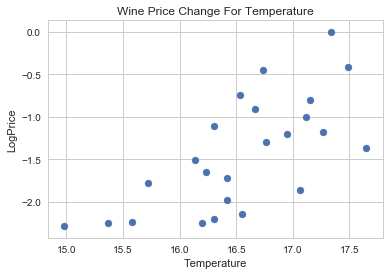

In [83]:
x = wine['Temperature']
y = wine['LogPrice']
plt.scatter(x, y) #Create a Scatterplot
plt.title('Wine Price Change For Temperature')
plt.xlabel('Temperature')
plt.ylabel('LogPrice')

In [24]:
wine2 = wine.drop(wine.index[wine['LogPrice'] == 0]) #Drop the 0
wine2.shape #Check it's been dropped

(23, 6)

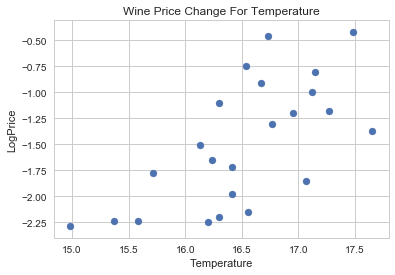

In [84]:
x = wine2['Temperature']
y = wine2['LogPrice']
plt.scatter(x, y) #Create ScatterPlot without the 0
plt.title('Wine Price Change For Temperature')
plt.xlabel('Temperature')
plt.ylabel('LogPrice')

created plots with a regression line to check the relationship between all the variables and the LogPrice. Want to see if any of the data needs to be normalised.

Although some of the relationships aren't particularly strong, they all seem normal enough to continue with a linear regression model.

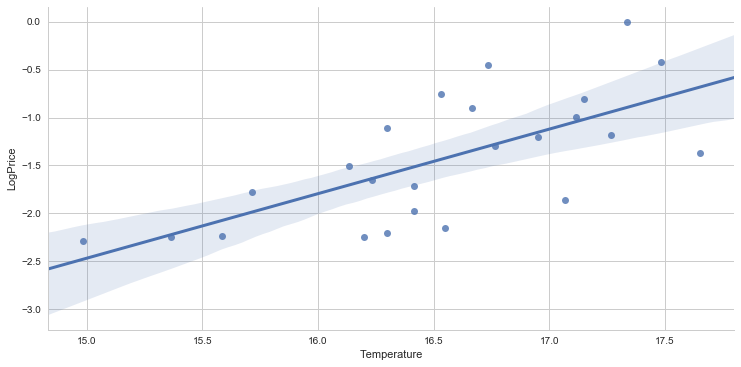

In [47]:
sns.lmplot("Temperature", "LogPrice", wine, size = 5.2, aspect = 2);
plt.savefig("WineTemperatureLogPrice.png", dpi = 300, bbox_inches = 'tight')


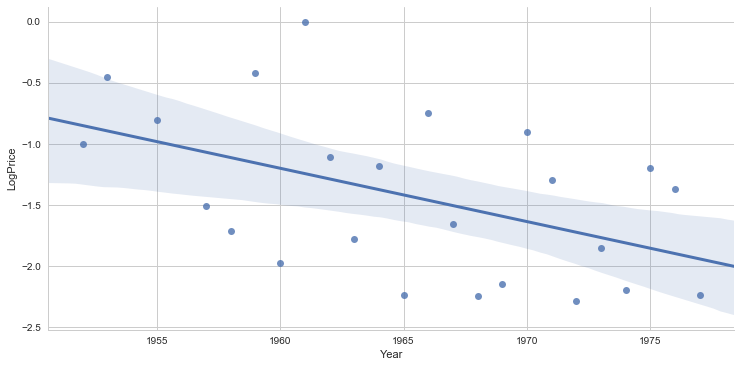

In [30]:
sns.lmplot("Year", "LogPrice", wine, size = 5.2, aspect = 2);
plt.savefig("WineYearLogPrice.png", dpi = 300, bbox_inches = 'tight')

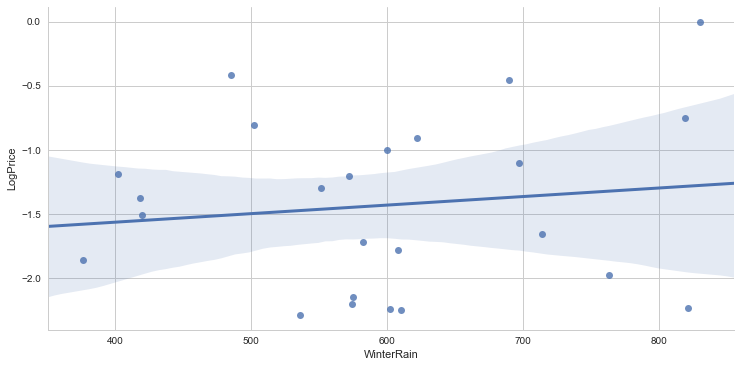

In [31]:
sns.lmplot("WinterRain", "LogPrice", wine, size = 5.2, aspect = 2);
plt.savefig("WineLogPriceWinterRain.png", dpi = 300, bbox_inches = 'tight')

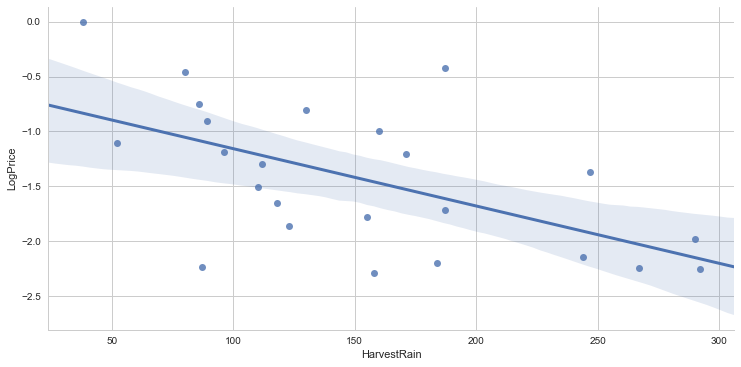

In [32]:
sns.lmplot("HarvestRain", "LogPrice", wine, size = 5.2, aspect = 2);
plt.savefig("WineLogPriceHarvestRain.png", dpi = 300, bbox_inches = 'tight')

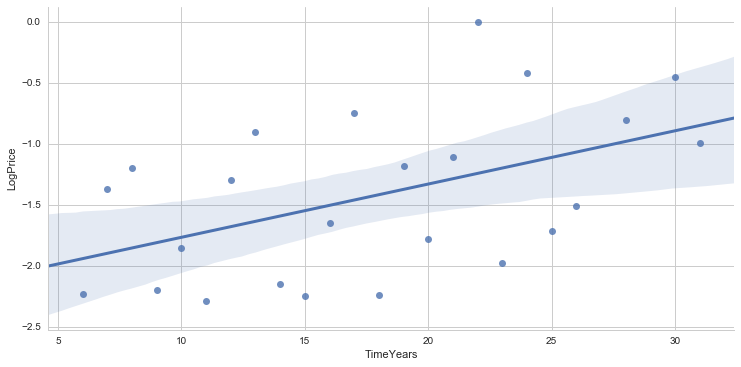

In [33]:
sns.lmplot("TimeYears", "LogPrice", wine, size = 5.2, aspect = 2);
plt.savefig("WineLogPriceTimeYears.png", dpi = 300, bbox_inches = 'tight')

Looking at the OLS regression results from the linear model the first thing I notice is the R-Squared values with it being at 0.468, meaning that the model explains just below half of the vairiablity for the LogPrice data. The F-Stastic of 19.34 indicates a resonably significant fit between the two variables.

We have a correlation coefficient of 0.6944 indicates a moderately strong relationship and a p-value below 0.05 indicating that it is statisically significant.

There is also a positive kurtosis indicating fatter tails on the distribution.

In [69]:
x = wine[['Temperature']]  #Independent variable
y = wine[['LogPrice']] #Dependent Variable
X = sm.add_constant(x) #Add an intercept to the model
model = sm.OLS(y, x).fit() 
predictions = model.predict(x) #Make the predictions by the model

model.summary() #print out the statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     19.34
Date:                Wed, 13 Sep 2017   Prob (F-statistic):           0.000228
Time:                        17:42:29   Log-Likelihood:                -16.506
No. Observations:                  24   AIC:                             37.01
Df Residuals:                      22   BIC:                             39.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5322      0.248     70.625      0.000      17.017      18.047
LogPrice       0.6944      0.158      4.398      0.000       0.367       1.022
==============================================================================
Omnibus:                        0.180   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.331
Skew:                           0.169   Prob(JB):                        0.848
Kurtosis:                       2.535   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
est = LinearRegression(fit_intercept = True) 

x = wine[['Temperature']]
y = wine[['LogPrice']]

est.fit(x, y)
model = LinearRegression()  #Fit the model to get MSE and R^2
model.fit(x, y)
y_hat = model.predict(x)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)
print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())

Coefficients: [[ 0.67366881]]
Intercept: [-12.57270629]
MSE: 0.224758806931
R^2: -0.13761847304
var: LogPrice    0.44069
dtype: float64


Once the addition of the second independent variable, we see changes in the data with the most significant being the change to the R2 error value. First off in the OLS regression result we see R-Squared jump up to 0.6 meaning that with the second variable we can explain more of the variablity which is always the case when adding a second independent variable. The R^2 erro is now actually positive with the second independent variable indicating a much better model fit with the LogPrice that with just one.

In [65]:
X = wine[['Temperature', 'Year']]  
y = wine[['LogPrice']] 
X = sm.add_constant(X) 
model2 = sm.OLS(y, X).fit() 
predictions2 = model2.predict(X)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     15.77
Date:                Wed, 13 Sep 2017   Prob (F-statistic):           6.58e-05
Time:                        17:10:09   Log-Likelihood:                -12.706
No. Observations:                  24   AIC:                             31.41
Df Residuals:                      21   BIC:                             34.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          53.8237     25.264      2.130      0.045       1.283     106.364
Temperature     0.6038      0.138      4.362      0.000       0.316       0.892
Year           -0.0332      0.013     -2.639      0.015      -0.059      -0.007
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.075
Skew:                           0.220   Prob(JB):                        0.584
Kurtosis:                       2.062   Cond. No.                     5.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
est = LinearRegression(fit_intercept = True)

x = wine[['Temperature', 'Year']]
y = wine[['LogPrice']]

est.fit(x, y)
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)
print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())

Coefficients: [[ 0.60381912 -0.03319669]]
Intercept: [ 53.82366112]
MSE: 0.168799076132
R^2: 0.334202921798
var: LogPrice    0.44069
dtype: float64


To check for multicollinearity I looked at the relationship between year and temperature, the two independent variables I used for the linear model before. A very low R-Squared shows that there is not much variablity that can be explained from these tow variables and a coefficient that is very close to 0 that the two variables don't have a relation of any kind. 

Since it seems that these two variables are not correlated with one another, the previous models are unlikely to have any multicollinearity issues.

In [88]:
X = wine[['Year']]
y = wine[['Temperature']]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8350
Date:                Thu, 14 Sep 2017   Prob (F-statistic):              0.371
Time:                        14:06:20   Log-Likelihood:                -23.628
No. Observations:                  24   AIC:                             51.26
Df Residuals:                      22   BIC:                             53.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6936     37.378      1.356      0.189     -26.823     128.210
Year          -0.0174      0.019     -0.914      0.371      -0.057       0.022
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   2.662
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.388
Skew:                          -0.273   Prob(JB):                        0.823
Kurtosis:                       2.699   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
est = LinearRegression(fit_intercept = True)

x = wine[['Year']]
y = wine[['Temperature']]

est.fit(x, y)
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)
print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())

Coefficients: [[-0.01737928]]
Intercept: [ 50.69355895]
MSE: 0.419419149448
R^2: -25.3462912178
var: Temperature    0.454266
dtype: float64
